In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Advanced Learning Algorithms/Week 1/optional-labs

Mounted at /content/drive
/content/drive/My Drive/Advanced Learning Algorithms/Week 1/optional-labs


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


## **Loading Dataset**

In [6]:
X,Y = load_coffee_data();
Y

#print(X.shape, Y.shape)

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],

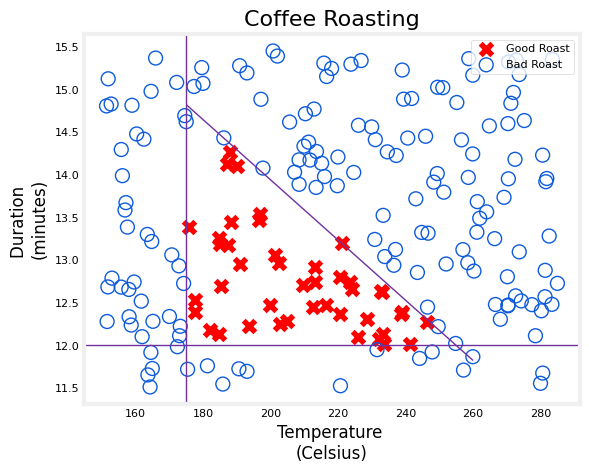

In [ ]:
plt_roast(X,Y)

In [ ]:
print(f'Temperature Max, Min pre-normalization: {np.max(X[:,0]):.2f}, {np.min(X[:,0]):.2f}')
print(f'Duration    Max, Min pre-normalization: {np.max(X[:,1]):.2f}, {np.min(X[:,1]):.2f}')

#Creating a Normalization Layer using TensorFlow
norm_l = tf.keras.layers.Normalization(axis = -1)
norm_l.adapt(X)
Xn = norm_l(X)

print(f'Temperature Max, Min post-normalization: {np.max(Xn[:,0]):.2f}, {np.min(Xn[:,0]):.2f}')
print(f'Duration    Max, Min post-normalization: {np.max(Xn[:,1]):.2f}, {np.min(Xn[:,1]):.2f}')

Temperature Max, Min pre-normalization: 284.99, 151.32
Duration    Max, Min pre-normalization: 15.45, 11.51
Temperature Max, Min post-normalization: 1.66, -1.69
Duration    Max, Min post-normalization: 1.79, -1.70


## Tiling Data to Increase Size and Reduce Number of Training Epochs

In [ ]:
Xt = np.tile(Xn, (1000, 1))    #(Input array, tile dimensions)
Yt = np.tile(Y, (1000, 1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


# **TensorFlow Model**

In [ ]:
tf.random.set_seed(1234)  # applied to achieve consistent results

tf.random.set_seed(1234)  # applied to achieve consistent results

model = Sequential(
    [
        tf.keras.Input(shape = (2,)),
        Dense(3, activation = 'sigmoid', name = 'layer1'),
        Dense(1, activation = 'sigmoid', name = 'layer2')
    ]
)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
L1_num_parameters = (2 * 3) + 3     #(Units in * units out) + b in
L2_num_parameters = (3 * 1) + 1     #(Units in * units out) + b in
print("L1 parameters = ", L1_num_parameters, ", L2 parameters = ", L2_num_parameters)

L1 parameters =  9 , L2 parameters =  4


In [ ]:
W1, b1 = model.get_layer('layer1').get_weights()
W2, b2 = model.get_layer('layer2').get_weights()
print(f'W1{W1.shape}:\n', W1, f'\nb1{b1.shape}:', b1)
print(f'W2{W2.shape}:\n', W2, f'\nb1{b2.shape}:', b2)

W1(2, 3):
 [[ 0.21 -0.82  0.6 ]
 [ 0.22 -0.4  -0.77]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 0.79]
 [-0.85]
 [ 1.02]] 
b1(1,): [0.]


In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
)

model.fit(
    Xt, Yt,
    epochs = 10
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.2992
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1314
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 0.1182
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0545
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.0182
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0117
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0082
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0058
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0042
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0030


## Updated Weights

In [ ]:
W1, b1 = model.get_layer('layer1').get_weights()
W2, b2 = model.get_layer('layer2').get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-10.75  -0.03 -17.34]
 [ -0.19  -8.57 -14.56]] 
b1: [-11.76 -10.7   -2.59]
W2:
 [[-47.15]
 [-42.75]
 [ 33.65]] 
b2: [-9.14]


In [ ]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
predictions = 
 [[9.59e-01]
 [1.04e-04]]


In [ ]:
yhat = np.zeros_like(predictions)

for i in range(len(predictions)):
    if predictions[i]>= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0

print(f'Decisions: \n{yhat}')

#####OR#####
#yhat = (predictions >=0.5).astype(int)
#print(f'Decisions: \n{yhat}')

Decisions: 
[[1.]
 [0.]]


# Layer Functions

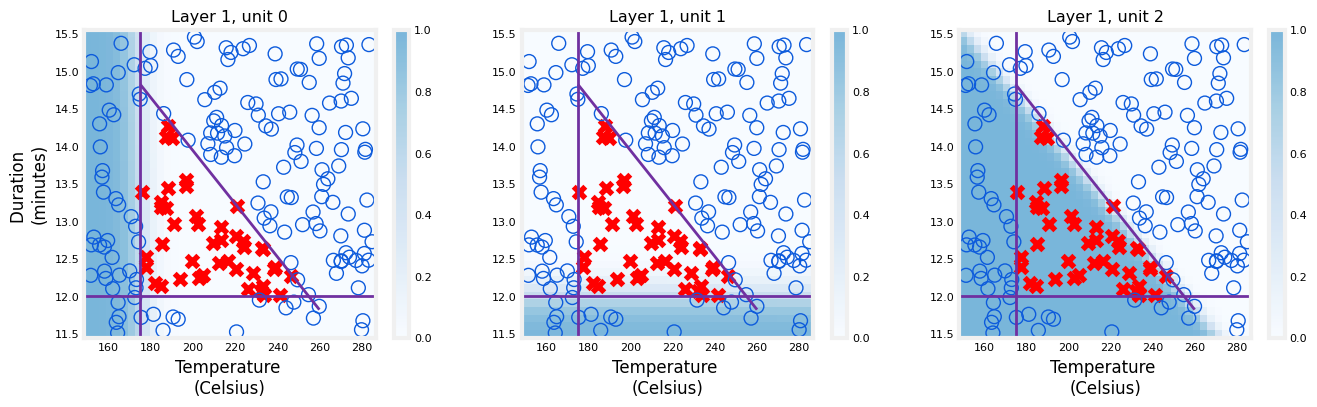

In [ ]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

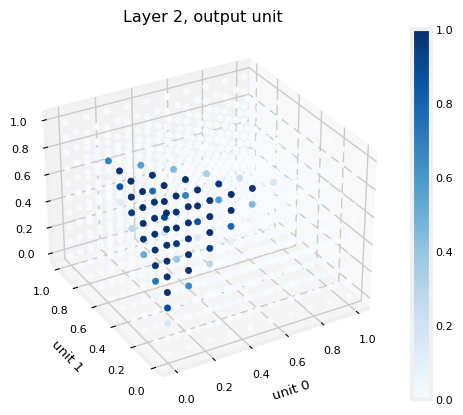

In [ ]:
plt_output_unit(W2,b2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━

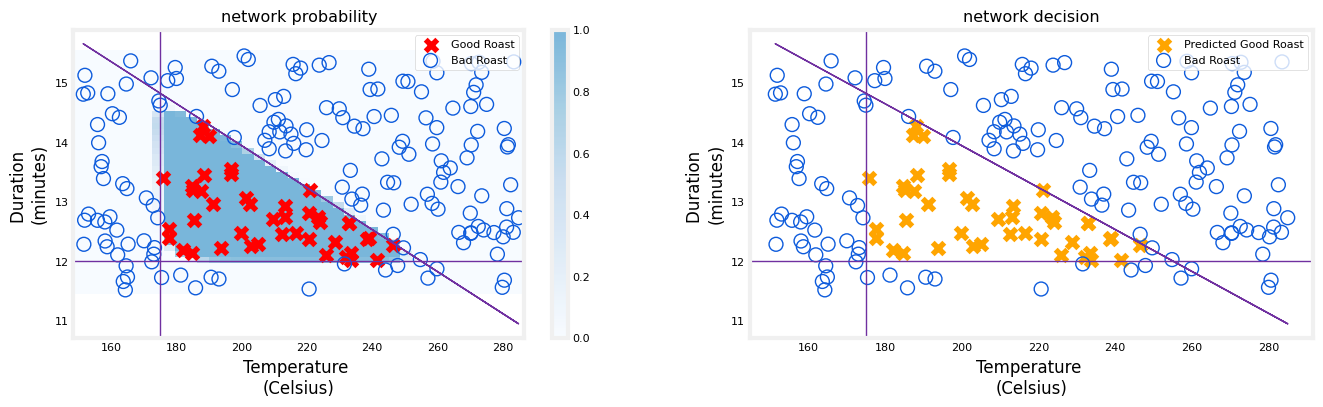

In [ ]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)